## By : V.N.Sirichandana
### The Sparks Foundation
### DataScience & Business Analytics Intern
### Task-2 :Clustering using unsupervised MachineLearning
### For this we have to apply KMeans Clustering algorithm to cluster the different types of flowers
### Problem statement:- To Predict the optimum number of clusters and represent it visually.

In [1]:
#importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets




In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Now we have to determine the optimum number of clusters for the given dataset

In [3]:
# so for that we are finding optimum clusters with KMeans algorithm

# taking values of the columns sepal length,sepal width,petal length,petal width
x = iris_df.iloc[:, [0, 1, 2, 3]].values

#importing KMeans into jupyter notebook
from sklearn.cluster import KMeans

#creating a list to store values of wcss for different no.of clustures
wcss = []


### Training the data with KMeans

In [4]:
#fitting the KMeans algorithm for different no.of clustures 
#and appending that wcss value to the list

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Ploting the wcss score

#### For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease

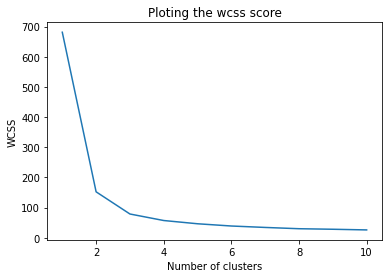

In [5]:

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Ploting the wcss score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


### By visualising the graph clearly by the "elbow method" the optimum clusters occured where the elbow occured
### This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.



### So by observing the graph we can choose number of clusters as :- 3
### Fitting the Model with 3 clusters


In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
# with choosen 3 number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


In [7]:
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Visualising the clusters

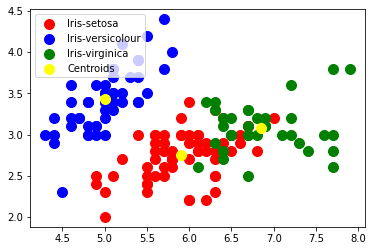

In [8]:
# Visualising the clusters - On the first two columns
# selecting the type of flower by predicted value of y_kmeans 
# and visualising through a scatter plot with parameters as size of point,color,label
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the 3 clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')


# specifying the size of plot and ploting 
plt.legend(loc=2, prop={'size': 10})


## Conclusion
### After Sucessful model building and obtaining predictions on the data,

### we can conclude that for given data there are 3 optimum clusters

